In [1]:
# importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

### 1. Carga de datos:
  * Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
  * Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

In [2]:
# cargamos el dataset
ruta='../data/data.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(569, 33)

In [3]:
df.head() # mostramos las primeras filas del dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns # listamos los titulos de las columnas del dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info() # mostramos informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum() # verificamos si existen valores nulos

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df['Unnamed: 32'].isnull().sum() # verificamos cuantos valores nulos hay pra la columna 

569

In [8]:
df = df.drop(columns=['Unnamed: 32']) # eliminamos la columna que no tiene valores

### 2. Exploración y preprocesamiento de datos:
  * Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
  * Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

In [9]:
# Verificamos si hay registros duplicados
duplicates = df.duplicated().sum()
print(f'Número de registros duplicados: {duplicates}')


Número de registros duplicados: 0


In [10]:
# Eliminamos los registros duplicados si existen
df.drop_duplicates(inplace=True)

In [11]:
# Seleccionamos solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calculamos los cuartiles Q1 y Q3
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calculamos el IQR
IQR = Q3 - Q1

# Filtramos los outliers
mask = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# Aplicamos la máscara al DataFrame original para mantener las filas con outliers, incluyendo la columna 'diagnosis'
df_filtered = df[mask]


In [12]:
# Seleccionamos las características relevantes para el análisis (excluyendo la columna 'Unnamed: 32' y 'id')
features = df_filtered.columns[2:-1]  # Asumiendo que las primeras dos columnas son 'id' y 'diagnosis'

# Estandarizamos las características seleccionadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[features])

In [13]:

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento y 20% prueba)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

### 3. Implementación de la MLP:
  * Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
  * Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.

Epsilon: 0.5, Min_samples: 5, Clusters: 0, Noise: 276


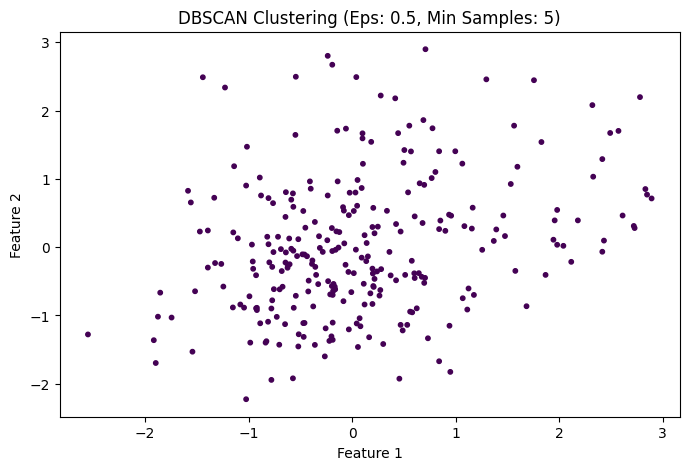

Epsilon: 0.5, Min_samples: 10, Clusters: 0, Noise: 276


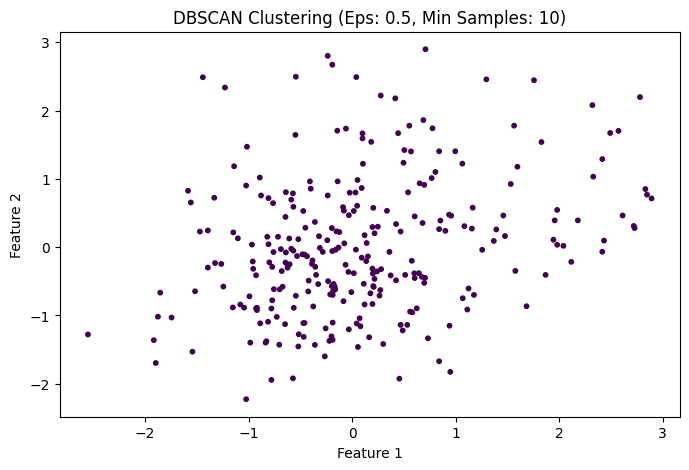

Epsilon: 0.5, Min_samples: 15, Clusters: 0, Noise: 276


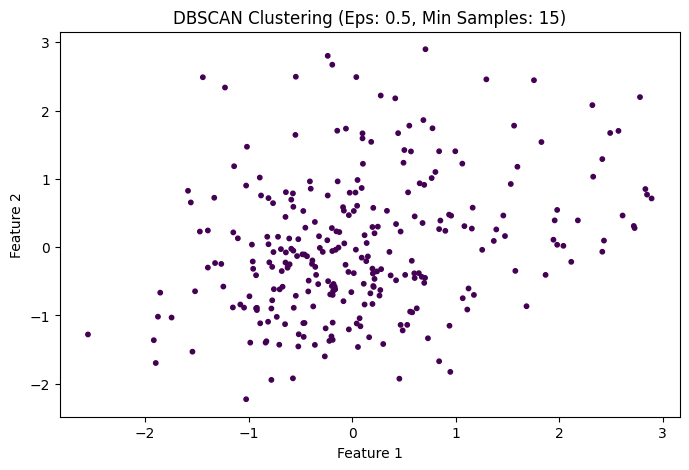

Epsilon: 0.7, Min_samples: 5, Clusters: 0, Noise: 276


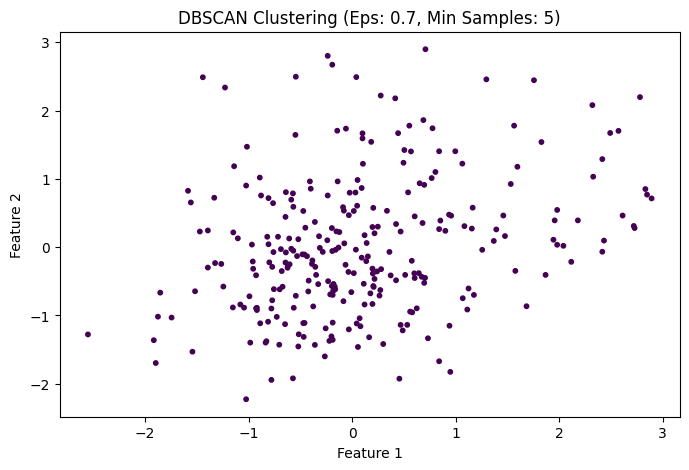

Epsilon: 0.7, Min_samples: 10, Clusters: 0, Noise: 276


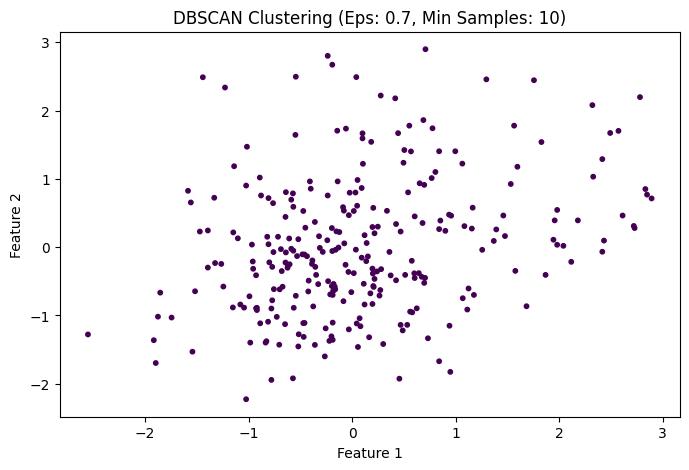

Epsilon: 0.7, Min_samples: 15, Clusters: 0, Noise: 276


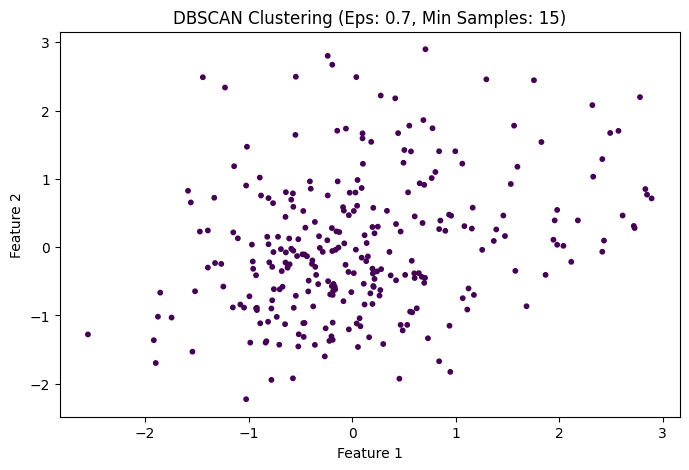

Epsilon: 1.0, Min_samples: 5, Clusters: 0, Noise: 276


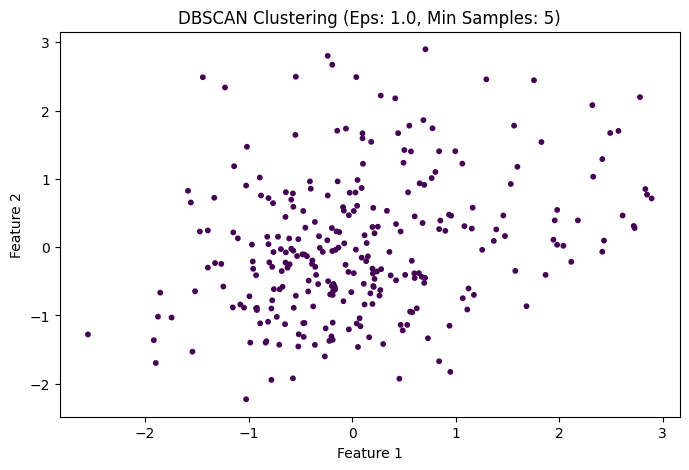

Epsilon: 1.0, Min_samples: 10, Clusters: 0, Noise: 276


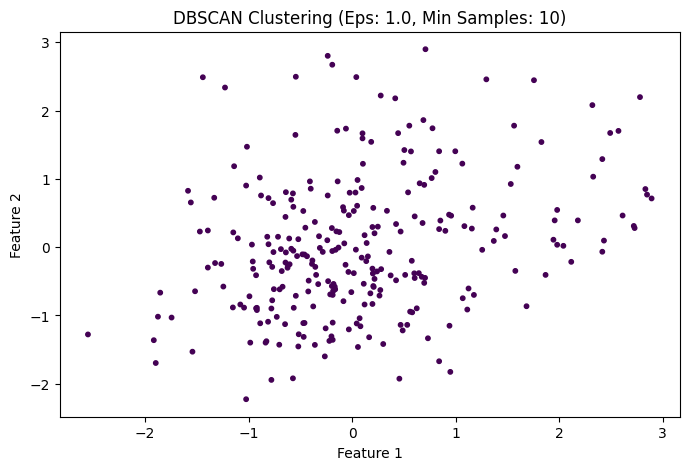

Epsilon: 1.0, Min_samples: 15, Clusters: 0, Noise: 276


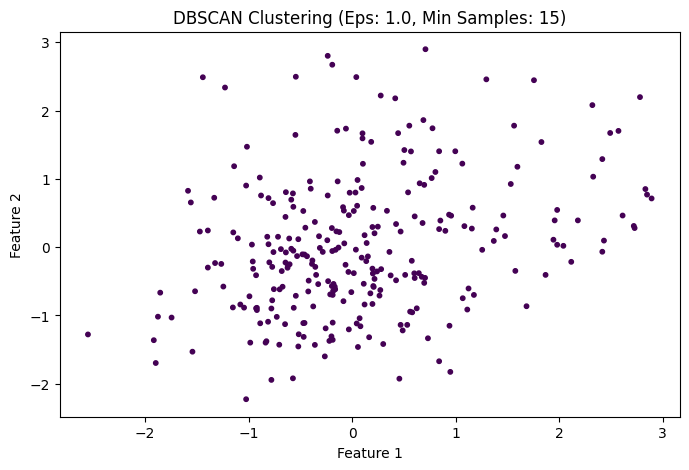

In [14]:
# Definimos los parámetros epsilon y min_samples
epsilon_values = [0.5, 0.7, 1.0]  # Distancias máximas para considerar dos puntos como vecinos
min_samples_values = [5, 10, 15]   # Número mínimo de puntos requeridos para formar un cluster

# Aplicamos DBSCAN con diferentes combinaciones de parámetros
for eps in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)

        # Contamos cuántos clusters se formaron (incluyendo ruido)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Restamos uno si hay ruido (-1)
        n_noise = list(labels).count(-1)  # Contamos los puntos considerados ruido
        
        print(f'Epsilon: {eps}, Min_samples: {min_samples}, Clusters: {n_clusters}, Noise: {n_noise}')

        # Visualizamos los resultados del clustering en un gráfico de dispersión (usando solo las dos primeras características para simplicidad)
        plt.figure(figsize=(8, 5))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', s=10)
        plt.title(f'DBSCAN Clustering (Eps: {eps}, Min Samples: {min_samples})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

### 4. Entrenamiento del modelo:
  * Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
  * Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

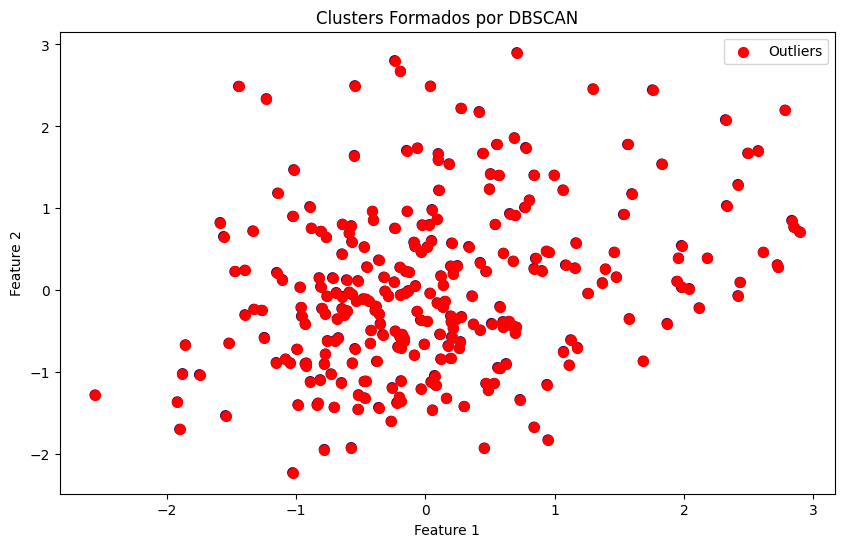

In [15]:
# creamos una figura con un tamaño de 10x6 pulgadas
plt.figure(figsize=(10, 6))
# graficamos los puntos de entrenamiento, con colores definidos por las etiquetas 'labels', usando el mapa de colores 'viridis'
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', s=50)
# identificamos los outliers (valores atípicos), que están marcados como '-1' en 'labels'
# luego graficamos estos outliers en rojo para destacarlos en el gráfico
outliers = labels == -1
plt.scatter(X_train[outliers][:, 0], X_train[outliers][:, 1], color='red', label='Outliers', s=50)
# agregamos un título al gráfico para describir lo que estamos mostrando
plt.title('Clusters Formados por DBSCAN')
# agregamos etiquetas a los ejes X y Y para indicar qué características se están visualizando
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend() # mostramos la leyenda para identificar qué representan los colores y los puntos rojos (outliers)
plt.show() # mostramos el gráfico en pantalla


### 5. Evaluación del modelo:
  * Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
  * Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

In [16]:
# Dividir los datos en características (X) y la etiqueta (y)
X = df.drop(columns=['diagnosis'])  # Eliminamos la columna 'diagnosis' para que X contenga solo las características
y = df['diagnosis']  # 'y' será la columna 'diagnosis', que contiene las etiquetas

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Escalar las características

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Entrenamos el modelo (por ejemplo, Logistic Regression)
model = LogisticRegression(class_weight='balanced')  # Agregar 'class_weight' si los datos están desbalanceados
model.fit(X_train, y_train)

# 2. Realizamos las predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 3. Calculamos las métricas de evaluación
# Aquí no es necesario especificar 'pos_label', ya que las etiquetas ya están en formato 'B' y 'M'
precision = precision_score(y_test, y_pred, pos_label='M')  # 'M' es la clase positiva
recall = recall_score(y_test, y_pred, pos_label='M')  # 'M' es la clase positiva
f1 = f1_score(y_test, y_pred, pos_label='M')  # 'M' es la clase positiva
conf_matrix = confusion_matrix(y_test, y_pred)

# 4. Imprimimos los resultados
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Matriz de confusión:")
print(conf_matrix)


Precisión: 0.98
Recall: 0.98
F1-score: 0.98
Matriz de confusión:
[[70  1]
 [ 1 42]]


* Los resultados muestran que el modelo tiene un 98% de precision, una sencibilidad del 98%, el f1 score tambien en 98% indicando que el modelo tiene muy buen equilibrio.

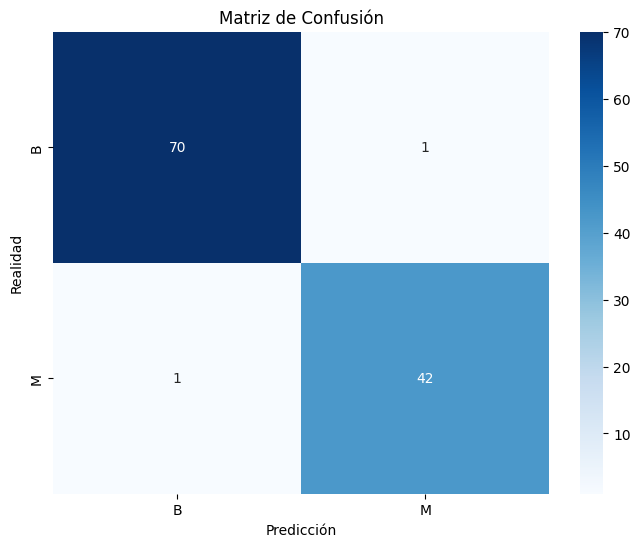

In [17]:
# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

* Podemos concluir que el modelo tiene un desempeño excelente, ya que tiene un 98% de aciertos, es decir, no comete tantos errores.